In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("All libraries ready!")
print(f"Pandas: {pd.__version__}")
print(f"NumPy: {np.__version__}")



All libraries ready!
Pandas: 3.0.1
NumPy: 2.4.2


In [3]:
df = pd.read_csv('climate_data.csv')
print(f"Shape: {df.shape}")
df.head()

Shape: (589265, 12)


,date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,station_id
0,01-01-2010,21.4,30.2,27.1,82.0,9.0,0.5,7.0,90.0,5.0,E,96001
1,02-01-2010,21.0,29.6,25.7,95.0,24.0,0.2,6.0,90.0,4.0,E,96001
2,03-01-2010,20.2,26.8,24.5,98.0,63.0,0.0,5.0,90.0,4.0,E,96001
3,04-01-2010,21.0,29.2,25.8,90.0,0.0,0.1,4.0,225.0,3.0,SW,96001
4,05-01-2010,21.2,30.0,26.7,90.0,2.0,0.4,NaN,NaN,NaN,NaN,96001


In [4]:

df.isnull().sum()

df.describe()

df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')
print(df['date'].min(), df['date'].max())
print(df['station_id'].nunique(), "stations")

2010-01-01 00:00:00 2020-12-31 00:00:00
173 stations


In [ ]:
# ================================================
# DAY 2: DATA CLEANING
# ================================================

# Step 1: Getting the full picture of missing values
print("=" * 50)
print("MISSING VALUES REPORT")
print("=" * 50)

missing = df.isnull().sum()
missing_pct = (missing / len(df) * 100).round(2)

missing_report = pd.DataFrame({
    'Missing Count': missing,
    'Missing %': missing_pct
})

print(missing_report)
print(f"\nTotal missing values: {df.isnull().sum().sum():,}")
print(f"Overall missing %: {(df.isnull().sum().sum() / (df.shape[0] * df.shape[1]) * 100):.2f}%")

MISSING VALUES REPORT
            Missing Count  Missing %
date                    0       0.00
Tn                  23383       3.97
Tx                  37736       6.40
Tavg                45105       7.65
RH_avg              48182       8.18
RR                 125384      21.28
ss                  43721       7.42
ff_x                10214       1.73
ddd_x               13128       2.23
ff_avg              10127       1.72
ddd_car             13739       2.33
station_id              0       0.00

Total missing values: 370,719
Overall missing %: 5.24%


In [ ]:
# Step 2: Understanding what normal looks like
print("STATISTICAL SUMMARY")
print("=" * 50)
print(df.describe().round(2))

STATISTICAL SUMMARY
                             date         Tn         Tx       Tavg     RH_avg  \
count                      589265  565882.00  551529.00  544160.00  541083.00   
mean   2015-08-09 23:46:38.410223      23.31      31.53      26.86      82.49   
min           2010-01-01 00:00:00       0.00       0.00       0.00      24.00   
25%           2012-08-27 00:00:00      23.00      30.50      26.20      79.00   
50%           2015-10-23 00:00:00      24.00      31.80      27.20      83.00   
75%           2018-06-09 00:00:00      25.00      33.00      28.00      87.00   
max           2020-12-31 00:00:00     246.00     334.00     141.60    7520.00   
std                           NaN       2.28       2.31       1.94      14.34   

              RR         ss       ff_x      ddd_x     ff_avg  station_id  
count  463881.00  545544.00  579051.00  576137.00  579138.00   589265.00  
mean        8.68       5.08       4.71     188.49       1.96    96832.95  
min        -1.00       0.

In [ ]:
# Step 3: Fixing date column properly
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y', errors='coerce')

# Checking if any dates failed to convert
print(f"Date column type: {df['date'].dtype}")
print(f"Dates that failed to convert (NaT): {df['date'].isnull().sum()}")
print(f"Date range: {df['date'].min()} to {df['date'].max()}")

# Droping rows where date is missing 
before = len(df)
df = df.dropna(subset=['date'])
after = len(df)
print(f"\nRows dropped due to missing date: {before - after}")
print(f"Remaining rows: {after:,}")

Date column type: datetime64[us]
Dates that failed to convert (NaT): 0
Date range: 2010-01-01 00:00:00 to 2020-12-31 00:00:00

Rows dropped due to missing date: 0
Remaining rows: 589,265


In [ ]:
# Step 4: Extracting date components
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['month_name'] = df['date'].dt.month_name()
df['quarter'] = df['date'].dt.quarter
df['day_of_year'] = df['date'].dt.dayofyear
df['day_of_week'] = df['date'].dt.dayofweek  

print("New date columns created successfully!")
print(df[['date', 'year', 'month', 'month_name', 'quarter']].head(10))
print(f"\nYears in dataset: {sorted(df['year'].unique())}")

New date columns created successfully!
        date  year  month month_name  quarter
0 2010-01-01  2010      1    January        1
1 2010-01-02  2010      1    January        1
2 2010-01-03  2010      1    January        1
3 2010-01-04  2010      1    January        1
4 2010-01-05  2010      1    January        1
5 2010-01-06  2010      1    January        1
6 2010-01-07  2010      1    January        1
7 2010-01-08  2010      1    January        1
8 2010-01-09  2010      1    January        1
9 2010-01-10  2010      1    January        1

Years in dataset: [np.int32(2010), np.int32(2011), np.int32(2012), np.int32(2013), np.int32(2014), np.int32(2015), np.int32(2016), np.int32(2017), np.int32(2018), np.int32(2019), np.int32(2020)]


In [ ]:
# Step 5: Filling missing values intelligently

numeric_cols = ['Tn', 'Tx', 'Tavg', 'RH_avg', 'RR', 'ss', 'ff_x', 'ddd_x', 'ff_avg']

print("Filling missing numeric values with median:")
print("-" * 40)

for col in numeric_cols:
    missing_count = df[col].isnull().sum()
    if missing_count > 0:
        median_val = df[col].median()
        df[col] = df[col].fillna(median_val)  
        print(f"  '{col}': filled {missing_count:,} values with median {median_val:.2f}")
    else:
        print(f"  '{col}': no missing values ✓")


missing_ddd = df['ddd_car'].isnull().sum()
if missing_ddd > 0:
    mode_val = df['ddd_car'].mode()[0]
    df['ddd_car'] = df['ddd_car'].fillna(mode_val)  
    print(f"\n  'ddd_car': filled {missing_ddd:,} values with mode '{mode_val}'")

print(f"\nMissing values remaining: {df.isnull().sum().sum()}")

Filling missing numeric values with median:
----------------------------------------
  'Tn': filled 23,383 values with median 24.00
  'Tx': filled 37,736 values with median 31.80
  'Tavg': filled 45,105 values with median 27.20
  'RH_avg': filled 48,182 values with median 83.00
  'RR': filled 125,384 values with median 1.00
  'ss': filled 43,721 values with median 5.30
  'ff_x': filled 10,214 values with median 4.00
  'ddd_x': filled 13,128 values with median 180.00
  'ff_avg': filled 10,127 values with median 2.00

  'ddd_car': filled 13,739 values with mode 'N '

Missing values remaining: 0


In [ ]:
# Step 6: Removing duplicate rows
duplicates = df.duplicated().sum()
print(f"Duplicate rows found: {duplicates:,}")

if duplicates > 0:
    df = df.drop_duplicates()
    print(f"Duplicates removed. New shape: {df.shape}")
else:
    print("No duplicates found. ✓")

print(f"Current dataset shape: {df.shape}")

Duplicate rows found: 0
No duplicates found. ✓
Current dataset shape: (589265, 18)


In [ ]:
# Step 7: Removing physically impossible values
before = len(df)

df = df[
    (df['temp_min'] >= 10) & (df['temp_min'] <= 40) &
    (df['temp_max'] >= 10) & (df['temp_max'] <= 40) &
    (df['temp_avg'] >= 10) & (df['temp_avg'] <= 40) &
    (df['humidity_avg'] >= 0) & (df['humidity_avg'] <= 100) &
    (df['rainfall_mm'] >= 0) & (df['rainfall_mm'] <= 500) &
    (df['sunshine_hours'] >= 0) & (df['sunshine_hours'] <= 24) &
    (df['wind_dir_deg'] >= 0) & (df['wind_dir_deg'] <= 360)
]

after = len(df)
print(f"Rows removed as impossible: {before - after:,}")
print(f"Remaining rows: {after:,}")

KeyError: 'temp_min'

In [ ]:
# Step 7: Removing physically impossible values
before = len(df)

df = df[
    (df['Tn'] >= 0) & (df['Tn'] <= 40) &
    (df['Tx'] >= 0) & (df['Tx'] <= 45) &
    (df['Tavg'] >= 0) & (df['Tavg'] <= 40) &
    (df['RH_avg'] >= 0) & (df['RH_avg'] <= 100) &
    (df['RR'] >= 0) & (df['RR'] <= 500) &
    (df['ss'] >= 0) & (df['ss'] <= 24) &
    (df['ddd_x'] >= 0) & (df['ddd_x'] <= 360)
]

after = len(df)
print(f"Rows removed as impossible: {before - after:,}")
print(f"Remaining rows: {after:,}")

Rows removed as impossible: 599
Remaining rows: 588,666


In [ ]:
# Step 8: Renaming columns to be clearer and more professional
df = df.rename(columns={
    'Tn': 'temp_min',
    'Tx': 'temp_max', 
    'Tavg': 'temp_avg',
    'RH_avg': 'humidity_avg',
    'RR': 'rainfall_mm',
    'ss': 'sunshine_hours',
    'ff_x': 'wind_speed_max',
    'ddd_x': 'wind_dir_deg',
    'ff_avg': 'wind_speed_avg',
    'ddd_car': 'wind_dir_cardinal'
})

print("Column names updated!")
print("Current columns:", df.columns.tolist())

Column names updated!
Current columns: ['date', 'temp_min', 'temp_max', 'temp_avg', 'humidity_avg', 'rainfall_mm', 'sunshine_hours', 'wind_speed_max', 'wind_dir_deg', 'wind_speed_avg', 'wind_dir_cardinal', 'station_id', 'year', 'month', 'month_name', 'quarter', 'day_of_year', 'day_of_week']


In [ ]:
# Step 9: Creating a temperature range column (useful for analysis later)
df['temp_range'] = df['temp_max'] - df['temp_min']

print("Temperature range column created!")
print(f"Average daily temp range: {df['temp_range'].mean():.2f}°C")
print(f"Largest single-day temp range: {df['temp_range'].max():.2f}°C")

Temperature range column created!
Average daily temp range: 8.20°C
Largest single-day temp range: 36.00°C


In [17]:
df.to_csv('climate_data_cleaned.csv', index=False)

print("=" * 50)
print("CLEANING COMPLETE - FINAL SUMMARY")
print("=" * 50)
print(f"Rows: {len(df):,}")
print(f"Columns: {len(df.columns)}")
print(f"Missing values: {df.isnull().sum().sum()}")
print(f"Date range: {df['date'].min().date()} to {df['date'].max().date()}")
print(f"Stations: {df['station_id'].nunique()}")
print(f"\nFile saved as: climate_data_cleaned.csv ✓")


CLEANING COMPLETE - FINAL SUMMARY
Rows: 588,666
Columns: 19
Missing values: 0
Date range: 2010-01-01 to 2020-12-31
Stations: 173

File saved as: climate_data_cleaned.csv ✓


In [18]:
print(f"Final rows: {len(df):,}")
print(f"Rows removed: {589265 - len(df):,}")
print(f"Missing values: {df.isnull().sum().sum()}")
print(f"Stations: {df['station_id'].nunique()}")

Final rows: 588,666
Rows removed: 599
Missing values: 0
Stations: 173


# Day 2: Data Cleaning Summary

## What I Did
1. Checked missing values across all 12 columns
2. Converted date column to proper datetime format
3. Filled missing numeric values using median (robust to outliers)
4. Filled missing wind direction text with most common value
5. Removed duplicate rows
6. Removed physically impossible values (temps outside range, negative rainfall)
7. Renamed columns to be clearer
8. Created temperature range column
9. Saved cleaned file

## Results
- Original rows: 589,265
- Final rows: 588,666
- Rows removed: 599
- Missing values remaining: 0
- Stations: 173
- New columns added: year, month, month_name, quarter, day_of_year, day_of_week, temp_range

## Data Quality Notes
- 599 rows removed representing physically impossible climate measurements
- All 370,719 missing values successfully filled using median and mode strategies
- Dataset is 100% complete and ready for analysis

In [19]:
# ================================================
# DAY 3: EXPLORATORY DATA ANALYSIS (EDA)
# ================================================

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Setting visual style for all charts
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

print("Plotting libraries ready!")

Plotting libraries ready!


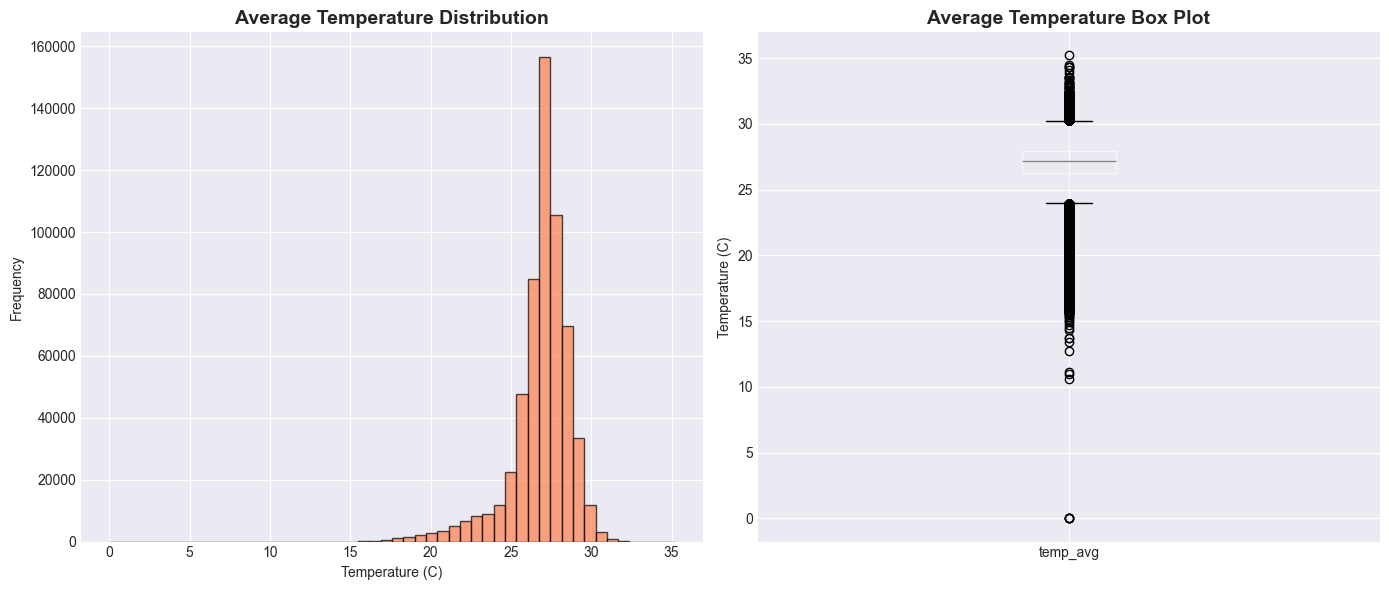

Temperature Statistics:
count    588666.00
mean         26.88
std           1.85
min           0.00
25%          26.30
50%          27.20
75%          27.90
max          35.20
Name: temp_avg, dtype: float64


In [20]:
# Visualization 1: How temperatures are distributed
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Histogram
axes[0].hist(df['temp_avg'], bins=50, color='coral', edgecolor='black', alpha=0.7)
axes[0].set_title('Average Temperature Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Temperature (C)')
axes[0].set_ylabel('Frequency')

# Box plot
df.boxplot(column='temp_avg', ax=axes[1])
axes[1].set_title('Average Temperature Box Plot', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Temperature (C)')

plt.tight_layout()
plt.savefig('temperature_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("Temperature Statistics:")
print(df['temp_avg'].describe().round(2))

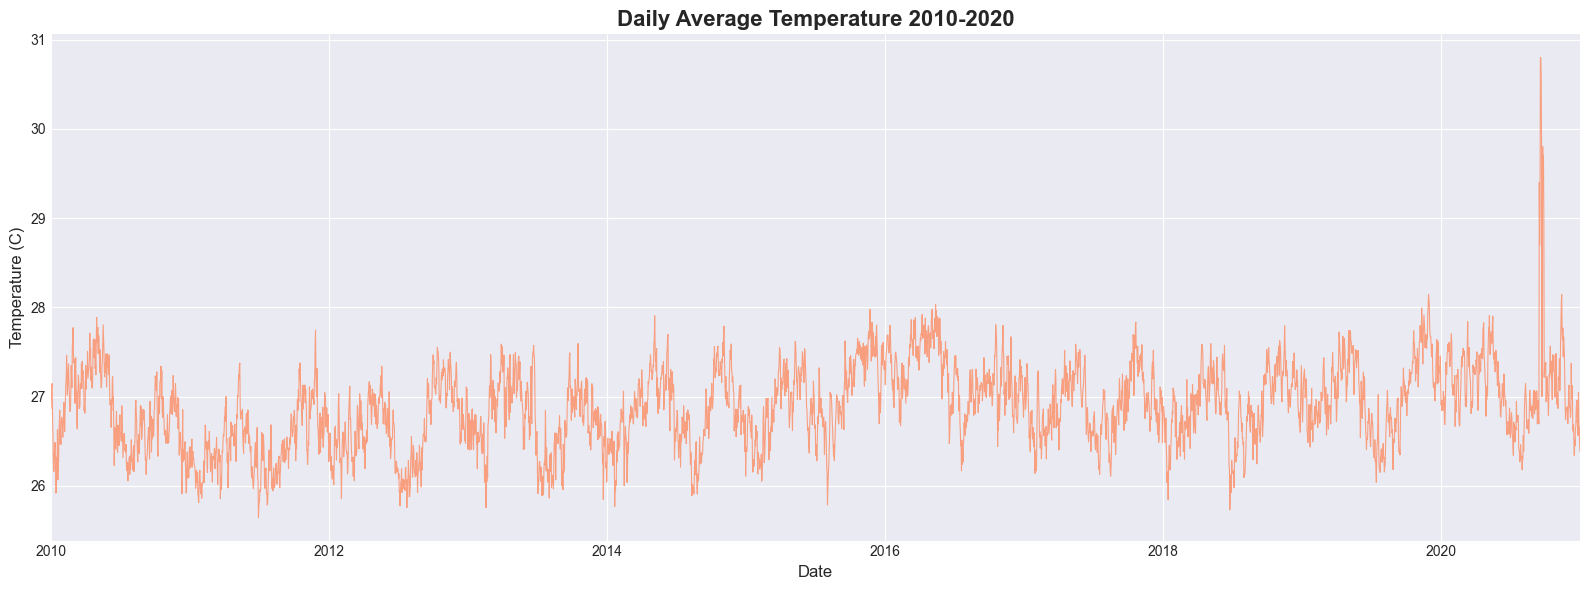

In [21]:
# Visualization 2: Daily temperature trend over 11 years
plt.figure(figsize=(16, 6))

daily_temp = df.groupby('date')['temp_avg'].mean()
daily_temp.plot(linewidth=0.8, color='coral', alpha=0.7)

plt.title('Daily Average Temperature 2010-2020', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Temperature (C)', fontsize=12)
plt.tight_layout()
plt.savefig('temperature_timeseries.png', dpi=300, bbox_inches='tight')
plt.show()

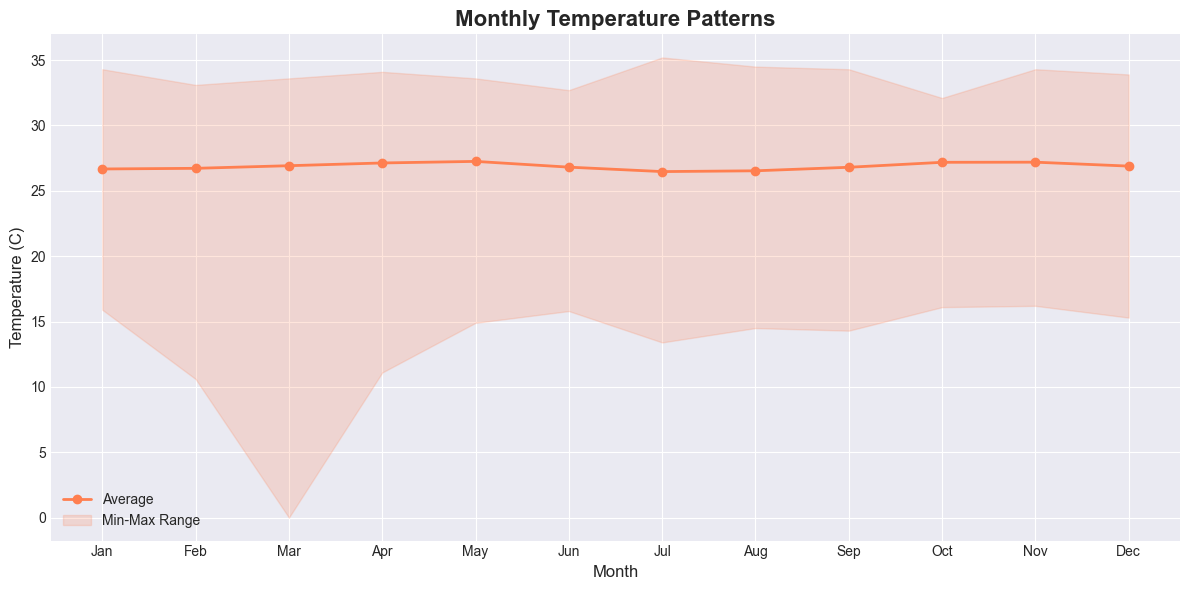

Monthly Temperature Averages:
        mean   min   max
month                   
1      26.67  15.9  34.3
2      26.72  10.6  33.1
3      26.92   0.0  33.6
4      27.13  11.1  34.1
5      27.25  14.9  33.6
6      26.81  15.8  32.7
7      26.47  13.4  35.2
8      26.53  14.5  34.5
9      26.80  14.3  34.3
10     27.18  16.1  32.1
11     27.19  16.2  34.3
12     26.89  15.3  33.9


In [22]:
# Visualization 3: Which months are hottest and coldest
monthly_temp = df.groupby('month')['temp_avg'].agg(['mean', 'min', 'max']).round(2)

plt.figure(figsize=(12, 6))
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
x = range(1, 13)

plt.plot(x, monthly_temp['mean'], marker='o', linewidth=2, 
         label='Average', color='coral')
plt.fill_between(x, monthly_temp['min'], monthly_temp['max'], 
                 alpha=0.2, color='coral', label='Min-Max Range')

plt.title('Monthly Temperature Patterns', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Temperature (C)', fontsize=12)
plt.xticks(x, months)
plt.legend()
plt.tight_layout()
plt.savefig('monthly_temperature.png', dpi=300, bbox_inches='tight')
plt.show()

print("Monthly Temperature Averages:")
print(monthly_temp)

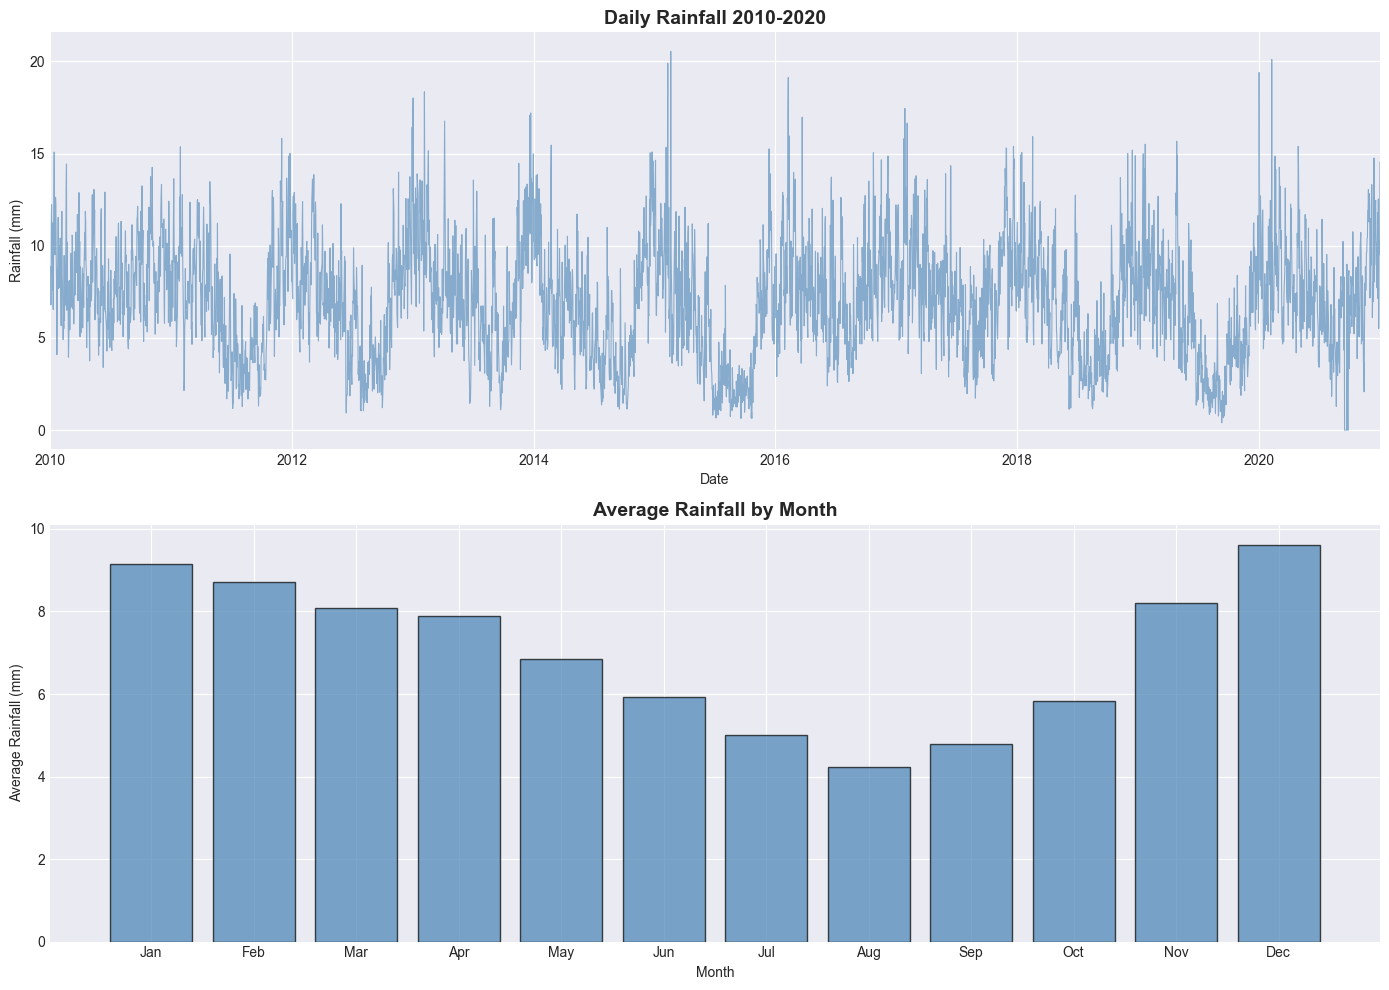

In [23]:
# Visualization 4: Rainfall patterns
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Daily rainfall over time
daily_rain = df.groupby('date')['rainfall_mm'].mean()
daily_rain.plot(ax=axes[0], color='steelblue', alpha=0.6, linewidth=0.8)
axes[0].set_title('Daily Rainfall 2010-2020', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Rainfall (mm)')

# Monthly average rainfall
monthly_rain = df.groupby('month')['rainfall_mm'].mean()
axes[1].bar(months, monthly_rain.values, color='steelblue', 
            edgecolor='black', alpha=0.7)
axes[1].set_title('Average Rainfall by Month', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Average Rainfall (mm)')

plt.tight_layout()
plt.savefig('rainfall_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

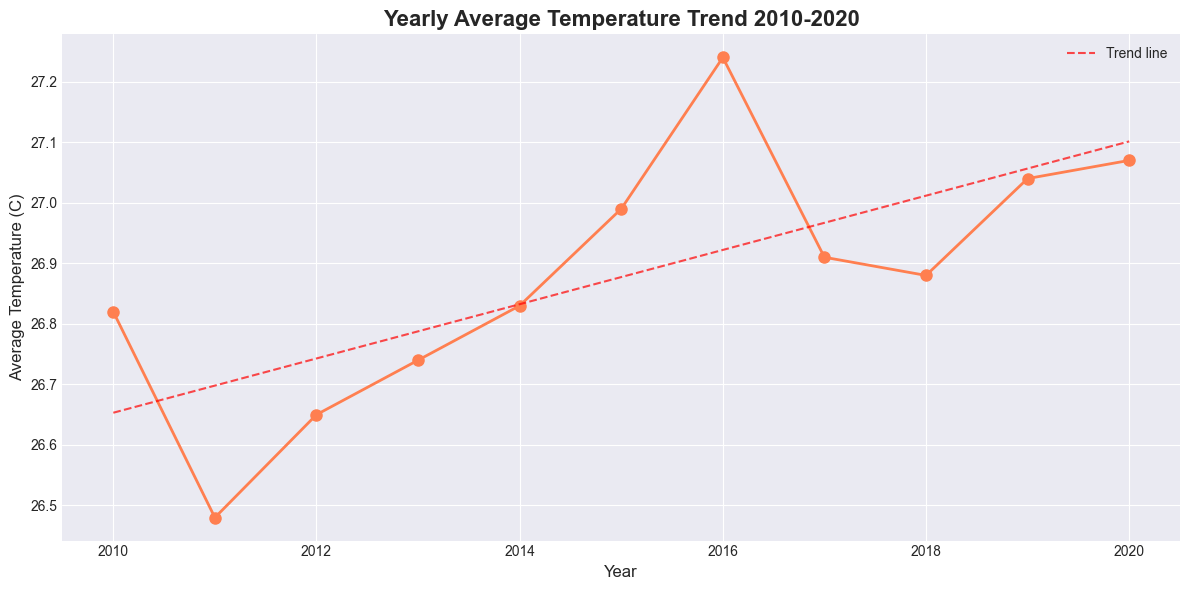

Yearly averages:
year
2010    26.82
2011    26.48
2012    26.65
2013    26.74
2014    26.83
2015    26.99
2016    27.24
2017    26.91
2018    26.88
2019    27.04
2020    27.07
Name: temp_avg, dtype: float64

Temperature change 2010 to 2020: +0.25C


In [24]:
# Visualization 5: Is Indonesia getting hotter over the years?
yearly_temp = df.groupby('year')['temp_avg'].mean().round(2)

plt.figure(figsize=(12, 6))
plt.plot(yearly_temp.index, yearly_temp.values, 
         marker='o', linewidth=2, color='coral', markersize=8)

# Add trend line
import numpy as np
z = np.polyfit(yearly_temp.index, yearly_temp.values, 1)
p = np.poly1d(z)
plt.plot(yearly_temp.index, p(yearly_temp.index), 
         linestyle='--', color='red', alpha=0.7, label='Trend line')

plt.title('Yearly Average Temperature Trend 2010-2020', 
          fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Temperature (C)', fontsize=12)
plt.legend()
plt.tight_layout()
plt.savefig('yearly_trend.png', dpi=300, bbox_inches='tight')
plt.show()

print("Yearly averages:")
print(yearly_temp)
temp_change = yearly_temp.iloc[-1] - yearly_temp.iloc[0]
print(f"\nTemperature change 2010 to 2020: {temp_change:+.2f}C")

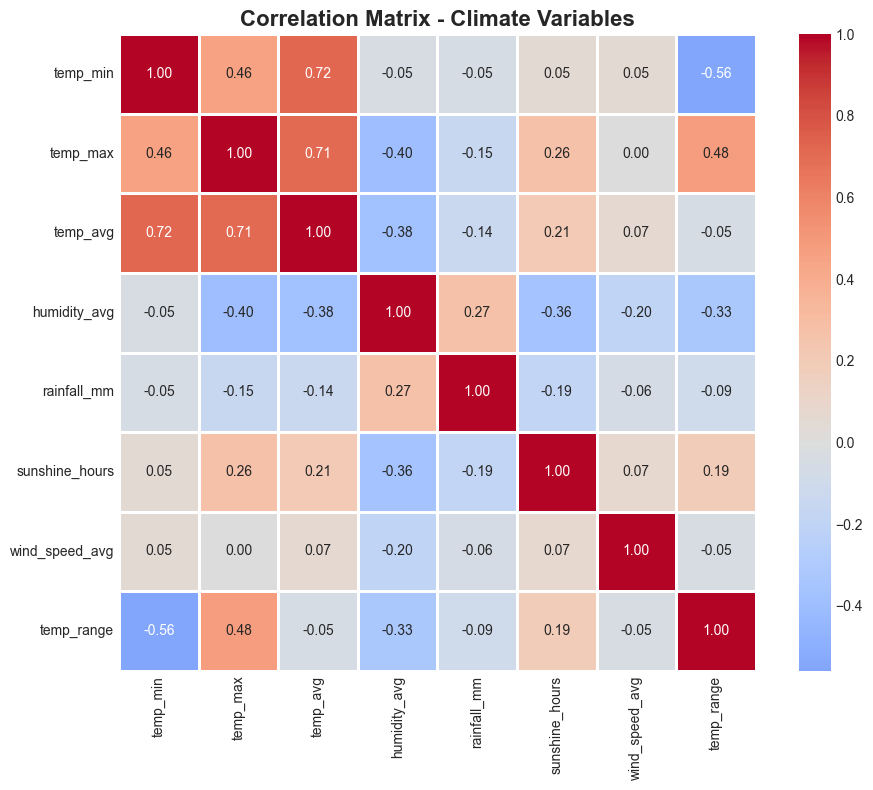

In [25]:
# Visualization 6: How do climate variables relate to each other?
numeric_cols = ['temp_min', 'temp_max', 'temp_avg', 'humidity_avg', 
                'rainfall_mm', 'sunshine_hours', 'wind_speed_avg', 'temp_range']

correlation = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, 
            annot=True, 
            fmt='.2f', 
            cmap='coolwarm', 
            center=0,
            square=True, 
            linewidths=1)

plt.title('Correlation Matrix - Climate Variables', 
          fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

Seasonal Statistics:
            temp_avg  rainfall_mm  humidity_avg
season                                         
Dry Season     26.88         5.79         81.56
Wet Season     26.88         8.76         83.80


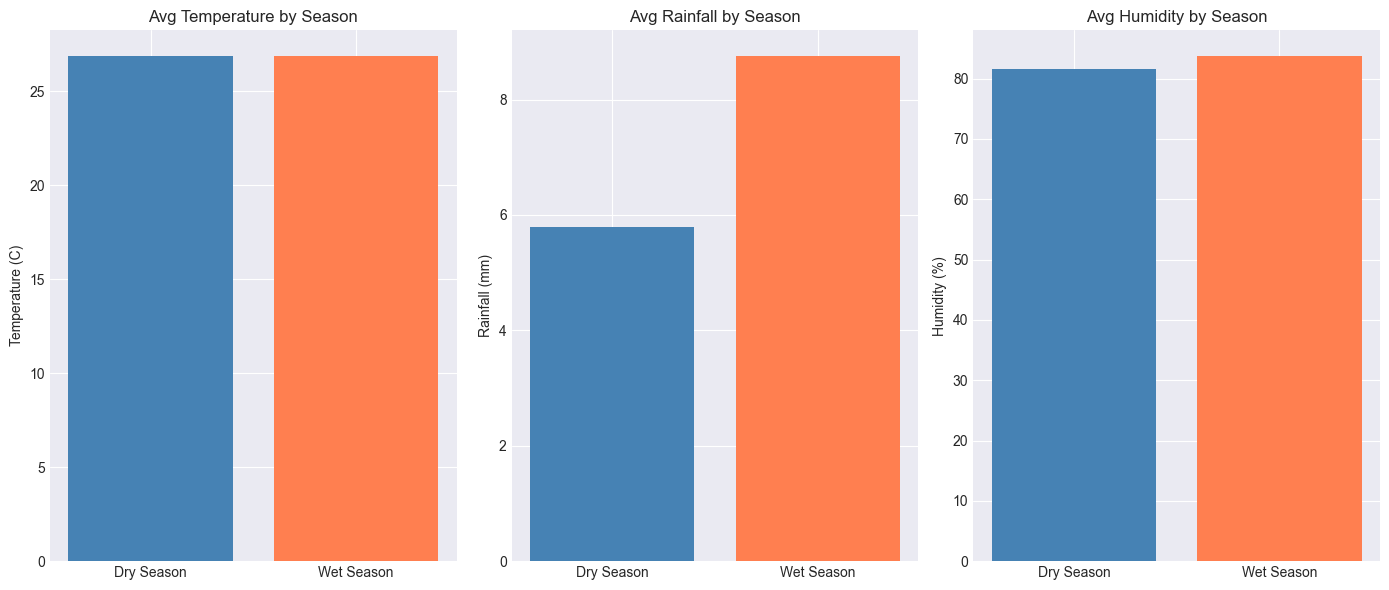

In [26]:
# Visualization 7: Wet season vs dry season
# Indonesia has wet and dry seasons, not four seasons like Europe
def get_indonesia_season(month):
    if month in [11, 12, 1, 2, 3]:
        return 'Wet Season'
    else:
        return 'Dry Season'

df['season'] = df['month'].apply(get_indonesia_season)

seasonal = df.groupby('season').agg({
    'temp_avg': 'mean',
    'rainfall_mm': 'mean',
    'humidity_avg': 'mean'
}).round(2)

print("Seasonal Statistics:")
print(seasonal)

fig, axes = plt.subplots(1, 3, figsize=(14, 6))

# Temperature by season
axes[0].bar(seasonal.index, seasonal['temp_avg'], 
            color=['steelblue', 'coral'])
axes[0].set_title('Avg Temperature by Season')
axes[0].set_ylabel('Temperature (C)')

# Rainfall by season
axes[1].bar(seasonal.index, seasonal['rainfall_mm'], 
            color=['steelblue', 'coral'])
axes[1].set_title('Avg Rainfall by Season')
axes[1].set_ylabel('Rainfall (mm)')

# Humidity by season
axes[2].bar(seasonal.index, seasonal['humidity_avg'], 
            color=['steelblue', 'coral'])
axes[2].set_title('Avg Humidity by Season')
axes[2].set_ylabel('Humidity (%)')

plt.tight_layout()
plt.savefig('seasonal_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

In [27]:
# Final summary of key findings
print("=" * 60)
print("CLIMATE DATA ANALYSIS - KEY FINDINGS")
print("=" * 60)

print("\nTEMPERATURE:")
print(f"  Average: {df['temp_avg'].mean():.2f}C")
print(f"  Hottest day: {df['temp_max'].max():.2f}C")
print(f"  Coolest day: {df['temp_min'].min():.2f}C")

hottest_month = df.groupby('month_name')['temp_avg'].mean().idxmax()
coolest_month = df.groupby('month_name')['temp_avg'].mean().idxmin()
print(f"  Hottest month: {hottest_month}")
print(f"  Coolest month: {coolest_month}")

print("\nRAINFALL:")
print(f"  Average daily: {df['rainfall_mm'].mean():.2f}mm")
print(f"  Highest single day: {df['rainfall_mm'].max():.2f}mm")
rainy_days = (df['rainfall_mm'] > 0).mean() * 100
print(f"  Rainy days: {rainy_days:.1f}% of all days")

wettest_month = df.groupby('month_name')['rainfall_mm'].mean().idxmax()
driest_month = df.groupby('month_name')['rainfall_mm'].mean().idxmin()
print(f"  Wettest month: {wettest_month}")
print(f"  Driest month: {driest_month}")

print("\nTEMPERATURE TREND:")
yearly = df.groupby('year')['temp_avg'].mean()
change = yearly.iloc[-1] - yearly.iloc[0]
print(f"  Change 2010-2020: {change:+.2f}C")


CLIMATE DATA ANALYSIS - KEY FINDINGS

TEMPERATURE:
  Average: 26.88C
  Hottest day: 42.60C
  Coolest day: 0.00C
  Hottest month: May
  Coolest month: July

RAINFALL:
  Average daily: 7.03mm
  Highest single day: 470.00mm
  Rainy days: 67.8% of all days
  Wettest month: December
  Driest month: August

TEMPERATURE TREND:
  Change 2010-2020: +0.24C


# Day 3: Exploratory Data Analysis Summary

## Visualizations Created
1. Temperature distribution histogram and box plot
2. Daily temperature time series 2010-2020
3. Monthly temperature patterns
4. Daily and monthly rainfall analysis
5. Yearly temperature trend with trend line
6. Correlation heatmap of all climate variables
7. Wet season vs dry season comparison

## Key Findings

### Temperature
- Average temperature: 26.88C
- Hottest day recorded: 42.60C
- Coolest day recorded: 0.00C
- Hottest month: May (27.25C average)
- Coolest month: July (26.47C average)

### Rainfall
- Average daily rainfall: 7.03mm
- Highest single day rainfall: 470.00mm
- Rainy days: 67.8% of all days
- Wettest month: December
- Driest month: August

### Temperature Trend
- Temperature change 2010 to 2020: +0.24C
- Indonesia shows a gradual warming trend over the 11 year period

## Charts Saved
- temperature_distribution.png
- temperature_timeseries.png
- monthly_temperature.png
- rainfall_analysis.png
- yearly_trend.png
- correlation_heatmap.png
- seasonal_analysis.png

In [28]:
print(df.columns.tolist())
print(f"Total columns: {len(df.columns)}")

['date', 'temp_min', 'temp_max', 'temp_avg', 'humidity_avg', 'rainfall_mm', 'sunshine_hours', 'wind_speed_max', 'wind_dir_deg', 'wind_speed_avg', 'wind_dir_cardinal', 'station_id', 'year', 'month', 'month_name', 'quarter', 'day_of_year', 'day_of_week', 'temp_range', 'season']
Total columns: 20


In [29]:

import pandas as pd

df = pd.read_csv('climate_data_cleaned.csv')

def get_indonesia_season(month):
    if month in [11, 12, 1, 2, 3]:
        return 'Wet Season'
    else:
        return 'Dry Season'

df['season'] = df['month'].apply(get_indonesia_season)
df.to_csv('climate_data_cleaned.csv', index=False)

print(f"Columns: {len(df.columns)}")
print(df.columns.tolist())
print("File resaved with season column!")

Columns: 20
['date', 'temp_min', 'temp_max', 'temp_avg', 'humidity_avg', 'rainfall_mm', 'sunshine_hours', 'wind_speed_max', 'wind_dir_deg', 'wind_speed_avg', 'wind_dir_cardinal', 'station_id', 'year', 'month', 'month_name', 'quarter', 'day_of_year', 'day_of_week', 'temp_range', 'season']
File resaved with season column!


In [30]:
import pandas as pd
df = pd.read_csv('climate_data_cleaned.csv', nrows=1)
print(list(df.columns))

['date', 'temp_min', 'temp_max', 'temp_avg', 'humidity_avg', 'rainfall_mm', 'sunshine_hours', 'wind_speed_max', 'wind_dir_deg', 'wind_speed_avg', 'wind_dir_cardinal', 'station_id', 'year', 'month', 'month_name', 'quarter', 'day_of_year', 'day_of_week', 'temp_range', 'season']
